This is a quick demo of *StableMotifs* for the control of attractors in Boolean networks, using Python module [stablemotifs](https://github.com/algorecell/StableMotifs-python). Further documentation and examples can be found at https://stablemotifs-python.readthedocs.io.

In [1]:
import stablemotifs
import biolqm
import ginsim
from colomoto_jupyter import tabulate

We use `biolqm` and `ginsim` to load and display the model from BooleanNet format. Note that `stablemotifs` can also take directly a the model filename as argument.

In [2]:
model = biolqm.load("MyeloidRules.txt", "booleannet")

In [3]:
ginsim.show(biolqm.to_ginsim(model, layout_scale=0.9))

Let us invoke StableMotifs on this model:

In [4]:
%time stm = stablemotifs.load(model)


Filename: model.txt
Creating Boolean table directory: model
Boolean table directory created.
Creating functions and names files.
Functions and names files created.
Performing network reduction...
Finding stable motifs in this network...
There are 3 stable motifs in this network: 
1/3	CEBPA=0	
2/3	GATA2=0	
3/3	GATA1=1	PU1=0	
Performing network reduction using motif 1/3...
Performing network reduction using motif 2/3...
Performing network reduction using motif 3/3...
Network reduction complete.
Removing duplicate quasi-attractors.
Total number of quasi-attractors: 6
Number of putative quasi-attractors: 0
Total time for finding quasi-attractors: 2.672658937 s
Writing TXT files with quasi-attractors and stable motifs.
Starting analyis of stable motif succession diagram.
Identifying quasi-attractors corresponding to stable motif sequences.
Shortening stable motif sequences.
Finding control sets for each stable motif...
Creating control sets for each stable motif sequence.
Removing duplicat

Attractors identify by StableMotifs can be displayed as follow

In [5]:
tabulate(stm.attractors)

,EgrNab,GATA1,GATA2,CEBPA,Fli1,cJun,Gfi1,FOG1,EKLF,PU1,SCL
0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,1,1,0,1
2,0,1,0,0,1,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,0,1,0
5,1,0,0,1,0,1,0,0,0,1,0


Here are the stable motifs:

In [6]:
stm.stable_motifs

[{'CEBPA': 0},
 {'GATA2': 0},
 {'GATA1': 1, 'PU1': 0},
 {'PU1': 0},
 {'Fli1': 0, 'GATA1': 0},
 {'GATA1': 0, 'PU1': 1},
 {'PU1': 1},
 {'GATA1': 1},
 {'EKLF': 0, 'Fli1': 1},
 {'EKLF': 1, 'Fli1': 0},
 {'CEBPA': 1},
 {'EgrNab': 0, 'Gfi1': 1},
 {'EgrNab': 1, 'Gfi1': 0, 'cJun': 1}]

In the following, we compute the perturbations for driving the system towards any of the previously-computed attractors matching with active *EgrNab* and *CEBPA*:

In [7]:
s = stm.reprogramming_to_attractor(EgrNab=1, CEBPA=1)
s

[FromAny(TemporaryPerturbation(CEBPA=1, EgrNab=1, GATA1=0, GATA2=0)),
 FromAny(TemporaryPerturbation(CEBPA=1, GATA1=0, GATA2=0, Gfi1=0)),
 FromAny(TemporaryPerturbation(CEBPA=1, EgrNab=1, GATA2=0, PU1=1)),
 FromAny(TemporaryPerturbation(CEBPA=1, GATA2=0, Gfi1=0, PU1=1))]

The results can be displayed as a graph:

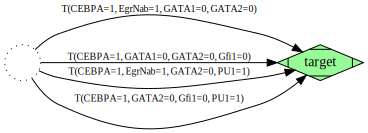

In [8]:
s.as_graph()

as a table:

In [9]:
s.as_table()

,CEBPA,EgrNab,GATA1,GATA2,Gfi1,PU1
0,1,,,0,0,1
1,1,,0,0,0,
2,1,1,,0,,1
3,1,1,0,0,,


or, as a set of perturbations:

In [10]:
s.perturbations()

{(TemporaryPerturbation(CEBPA=1, EgrNab=1, GATA1=0, GATA2=0),),
 (TemporaryPerturbation(CEBPA=1, EgrNab=1, GATA2=0, PU1=1),),
 (TemporaryPerturbation(CEBPA=1, GATA1=0, GATA2=0, Gfi1=0),),
 (TemporaryPerturbation(CEBPA=1, GATA2=0, Gfi1=0, PU1=1),)}